In [28]:
import pandas as pd
import numpy as np
data_rfe=pd.read_csv('norm_baiyunshan.csv')
data_rfe=np.array(data_rfe)
fea=data_rfe[:,:49]
target=data_rfe[:,49]
x_test=fea[:170,:]
y_test=target[:170]
x_train=fea[170:,:]
y_train=target[170:]

# SVM-RFE_RELIEF

In [29]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,alpha,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            #print(relief_score)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            #print(rfe_score)
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            #print(total_score)
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
    def sele_feature(self,alpha,optim_featur_num):
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            if len(candi_fea)==optim_featur_num:
                return candi_fea

In [30]:
rfe_relief_model=rfe_relief_SVM(x_train,y_train,0.1)

In [31]:
aver_mean_lis1,F_measure_lis1=rfe_relief_model.featu_score(0.15,5)
print(aver_mean_lis1,F_measure_lis1)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8090845033665641, 0.8106177253510098, 0.8106164204812358, 0.8116381335142753, 0.8111318440419646, 0.8116407432538233, 0.8147032726133933, 0.8131700506289473, 0.8085821285035755, 0.8070528211284514, 0.8101153504880212, 0.8136815595803538, 0.8136841693199018, 0.8167440889399238, 0.8167440889399238, 0.8141865441828905, 0.8126546270682187, 0.8152056474763819, 0.816229970248969, 0.8167401743306018, 0.8141839344433425, 0.8126520173286707, 0.8126520173286707, 0.8131648311498513, 0.8141826295735687, 0.8146902239156532, 0.8141800198340204, 0.8126507124588965, 0.810608591262592, 0.8100944725716375, 0.8100970823111853, 0.8085664700662875, 0.8060154496581241, 0.8090779790176938, 0.8080575708544286, 0.807546061903022, 0.8070371626911633, 0.807544757033248, 0.8065256537397568, 0.8060167545278981, 0.8055039407067175, 0.8055026358369435] [0.794535096096838, 0.7

In [32]:
aver_mean_lis2,F_measure_lis2=rfe_relief_model.featu_score(0.25,5)
print(aver_mean_lis2,F_measure_lis2)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8090845033665641, 0.8106177253510098, 0.8106164204812358, 0.8116381335142753, 0.8111318440419646, 0.8106216399603319, 0.8147032726133933, 0.8106281643092019, 0.8085821285035755, 0.8070528211284514, 0.8101153504880212, 0.8136815595803538, 0.8136841693199018, 0.8167440889399238, 0.8157236807766586, 0.8167453938096978, 0.8126546270682187, 0.8152056474763819, 0.816229970248969, 0.8167401743306018, 0.8141839344433425, 0.8126520173286707, 0.8126520173286707, 0.81061120100214, 0.8106112010021398, 0.8131635262800773, 0.812143118116812, 0.8126507124588965, 0.810608591262592, 0.8100944725716375, 0.8100970823111853, 0.8085664700662875, 0.8065243488699828, 0.8095881830993268, 0.8070358578213893, 0.8065256537397566, 0.8070358578213893, 0.8070371626911633, 0.8065256537397568, 0.8060167545278981, 0.8055039407067175, 0.8055026358369435] [0.794535096096838, 0.79

In [33]:
aver_mean_lis3,F_measure_lis3=rfe_relief_model.featu_score(0.35,5)
print(aver_mean_lis3,F_measure_lis3)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8090845033665641, 0.8106177253510098, 0.8106164204812358, 0.8141865441828905, 0.8111240148233207, 0.8106164204812358, 0.810615115611462, 0.8126611514170886, 0.806032412965186, 0.8075604154705361, 0.8045004958505141, 0.8080732292917168, 0.8106242496998799, 0.8152121718252519, 0.8157236807766586, 0.8167453938096978, 0.8126546270682187, 0.813676340101258, 0.8131661360196251, 0.8121483375959079, 0.8136789498408058, 0.8116368286445013, 0.8111266245628685, 0.807547366772796, 0.8065256537397568, 0.807546061903022, 0.807549976512344, 0.8060206691372201, 0.8065295683490789, 0.8106112010021398, 0.8095907928388748, 0.810612505871914, 0.8090805887572421, 0.8095881830993268, 0.8070358578213893, 0.8065256537397566, 0.8070358578213893, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8055039407067175, 0.8055026358369435] [0.794535096096838, 0.7929

In [34]:
aver_mean_lis4,F_measure_lis4=rfe_relief_model.featu_score(0.45,5)
print(aver_mean_lis4,F_measure_lis4)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8090845033665641, 0.8106177253510098, 0.8106164204812358, 0.810615115611462, 0.8111240148233207, 0.8106164204812358, 0.810615115611462, 0.8070449919098074, 0.8039798528106894, 0.8090884179758859, 0.8045004958505141, 0.8080732292917168, 0.8106242496998799, 0.8152121718252519, 0.8141930685317605, 0.8167453938096978, 0.8141904587922125, 0.8167414792003758, 0.8141904587922125, 0.8106177253510098, 0.8116381335142753, 0.8131713554987213, 0.8141930685317604, 0.8147006628738451, 0.8162338848582911, 0.807546061903022, 0.807549976512344, 0.8060206691372201, 0.8065295683490789, 0.8106112010021398, 0.8095907928388748, 0.810612505871914, 0.8090805887572421, 0.8095881830993268, 0.8070358578213893, 0.8065256537397566, 0.8070358578213893, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8055039407067175, 0.8055026358369435] [0.794535096096838, 0.79

In [35]:
aver_mean_lis5,F_measure_lis5=rfe_relief_model.featu_score(0.55,5)
print(aver_mean_lis5,F_measure_lis5)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8116381335142753, 0.8090845033665641, 0.8095934025784226, 0.8111279294326426, 0.8106177253510098, 0.8101036066600553, 0.810615115611462, 0.8070449919098074, 0.8039798528106894, 0.8090884179758859, 0.8045004958505141, 0.8080732292917168, 0.8106242496998799, 0.8152121718252519, 0.8141930685317605, 0.8136841693199018, 0.8111344537815126, 0.8136828644501278, 0.8147045774831673, 0.8147058823529412, 0.8116381335142753, 0.8131713554987213, 0.8141930685317604, 0.8147006628738451, 0.8162338848582911, 0.807546061903022, 0.807549976512344, 0.8060206691372201, 0.8065295683490789, 0.8044900568923221, 0.8080575708544286, 0.8080614854637508, 0.8090805887572421, 0.8090805887572421, 0.8070358578213893, 0.8065256537397566, 0.8070358578213893, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8055039407067175, 0.8055026358369435] [0.794535096096838, 0.

In [36]:
aver_mean_lis6,F_measure_lis6=rfe_relief_model.featu_score(0.65,5)
print(aver_mean_lis6,F_measure_lis6)

[0.7906910590323086, 0.7881400386241454, 0.7912038728534891, 0.7906923639020825, 0.8024401064773736, 0.8034657341197349, 0.8121483375959079, 0.8116381335142753, 0.8116381335142753, 0.8075525862518921, 0.8111279294326426, 0.810612505871914, 0.8101049115298293, 0.810615115611462, 0.8126598465473146, 0.8090884179758859, 0.8085769090244794, 0.8045004958505141, 0.8045004958505142, 0.8044991909807402, 0.8085834333733495, 0.8141930685317605, 0.815212171825252, 0.8162338848582911, 0.815212171825252, 0.8131661360196253, 0.8131674408893991, 0.8141852393131165, 0.8136763401012578, 0.8126559319379926, 0.8101009969205073, 0.8126533221984447, 0.8116303042956314, 0.810609896132366, 0.8116303042956312, 0.8131635262800773, 0.8111240148233207, 0.8101023017902813, 0.8090818936270161, 0.8080614854637508, 0.8065308732188529, 0.8075525862518921, 0.8060193642674461, 0.8080588757242028, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8014196983141083, 0.8055026358369435] [0.794535096096838, 0.79

In [37]:
aver_mean_lis7,F_measure_lis7=rfe_relief_model.featu_score(0.75,5)
print(aver_mean_lis7,F_measure_lis7)

[0.7906910590323086, 0.787118325591106, 0.7891617516571846, 0.8055026358369435, 0.8060206691372201, 0.8034657341197349, 0.8121483375959079, 0.8116381335142753, 0.8116381335142753, 0.8075525862518921, 0.8101023017902813, 0.810612505871914, 0.8101049115298293, 0.8075551959914401, 0.8090884179758859, 0.8101088261391514, 0.8080667049428467, 0.80755519599144, 0.8080654000730727, 0.8075538911216661, 0.8090884179758859, 0.807556500861214, 0.8106177253510098, 0.8106203350905579, 0.8126598465473146, 0.8131648311498513, 0.8111266245628685, 0.8106203350905581, 0.8116433529933713, 0.8111331489117386, 0.8085782138942534, 0.8080680098126207, 0.8070476016493554, 0.8055078553160395, 0.8080588757242028, 0.8044848374132261, 0.8044848374132261, 0.8034657341197349, 0.8090818936270161, 0.8080614854637508, 0.8065308732188529, 0.8075525862518921, 0.8060193642674461, 0.8080588757242028, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8014196983141083, 0.8055026358369435] [0.794535096096838, 0.79

In [38]:
aver_mean_lis8,F_measure_lis8=rfe_relief_model.featu_score(0.85,5)
print(aver_mean_lis8,F_measure_lis8)

[0.7906910590323086, 0.787118325591106, 0.7891617516571846, 0.8055026358369435, 0.8060206691372201, 0.8070423821702594, 0.8060167545278981, 0.8116381335142753, 0.8116381335142753, 0.8106190302207839, 0.8101023017902813, 0.810612505871914, 0.8101049115298293, 0.8075551959914401, 0.8090884179758859, 0.8101088261391514, 0.8080667049428467, 0.80755519599144, 0.8070436870400334, 0.8095986220575186, 0.8085782138942534, 0.807559110600762, 0.8101088261391514, 0.8131752701080431, 0.8116394383840493, 0.8111253196930945, 0.8090831984967901, 0.8080614854637508, 0.8095920977086488, 0.8085703846756094, 0.8085703846756094, 0.8095907928388748, 0.8101036066600553, 0.8095947074481966, 0.8090818936270161, 0.807546061903022, 0.8070358578213895, 0.8080575708544288, 0.8055065504462654, 0.8034657341197349, 0.8095907928388748, 0.8075499765123441, 0.8070371626911633, 0.8080588757242028, 0.8070371626911633, 0.8070358578213895, 0.8039733284618196, 0.8014196983141083, 0.8055026358369435] [0.794535096096838, 0.793

In [39]:
aver_mean_lis9,F_measure_lis9=rfe_relief_model.featu_score(0.95,5)
print(aver_mean_lis9,F_measure_lis9)

[0.7906910590323086, 0.79018868416932, 0.7901886841693198, 0.7932512135288899, 0.7978456600031316, 0.8065269586095308, 0.8024453259564694, 0.8111279294326426, 0.8090858082363379, 0.8090845033665641, 0.8070449919098074, 0.8065360926979487, 0.8060245837465422, 0.8080706195521687, 0.8090897228456599, 0.8090884179758859, 0.8080667049428467, 0.8126624562868626, 0.8116446578631452, 0.8121522522052299, 0.8090897228456599, 0.8101101310089251, 0.8101062163996031, 0.8106164204812358, 0.8101049115298293, 0.810613810741688, 0.8095934025784228, 0.8075551959914401, 0.8116355237747273, 0.8070423821702594, 0.8075538911216661, 0.8070436870400334, 0.8090831984967901, 0.8075525862518921, 0.8055091601858134, 0.8075499765123441, 0.8065282634793046, 0.8070384675609376, 0.8065269586095308, 0.7998930006785323, 0.8029581397776502, 0.8004045096299389, 0.8019364267446107, 0.8024453259564694, 0.801935121874837, 0.8014236129234302, 0.8039733284618196, 0.8014196983141083, 0.8055026358369435] [0.794535096096838, 0.7

In [68]:
np.max(aver_mean_lis1[:13]),np.max(aver_mean_lis2[:13]),np.max(aver_mean_lis3[:13]),np.max(aver_mean_lis4[:13]),np.max(aver_mean_lis5[:13])

(0.8121483375959079,
 0.8121483375959079,
 0.8141865441828905,
 0.8121483375959079,
 0.8121483375959079)

In [69]:
np.max(aver_mean_lis6[:13]),np.max(aver_mean_lis7[:13]),np.max(aver_mean_lis8[:13]),np.max(aver_mean_lis9[:13])

(0.8121483375959079,
 0.8121483375959079,
 0.8116381335142753,
 0.8111279294326426)

In [70]:
np.argmax(aver_mean_lis3[:13])

10

# SVM-RFE

In [40]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,x_train,y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,x_train,y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
   
    def featu_subset(self,featur_num):
        kf=KFold(n_splits=5,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            if len(candi_fea)==featur_num:
                break
        return candi_fea

In [41]:
rfe_SVM_model=rfe_SVM(x_train,y_train,0.1)
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis=rfe_SVM_model.featu_score(5)

In [42]:
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis

([0.7906910590323086,
  0.7881400386241454,
  0.7912038728534891,
  0.7906923639020825,
  0.8024401064773736,
  0.8034657341197349,
  0.8121483375959079,
  0.8126598465473146,
  0.8065321780886269,
  0.8075538911216661,
  0.8075551959914401,
  0.8080640952032987,
  0.8085729944151574,
  0.8152082572159299,
  0.8126611514170886,
  0.8126585416775406,
  0.8126572368077666,
  0.8147019677436192,
  0.8116368286445013,
  0.8126598465473146,
  0.813676340101258,
  0.813675035231484,
  0.8101023017902813,
  0.8095934025784226,
  0.8131661360196253,
  0.8157171564277885,
  0.8141852393131167,
  0.8141826295735687,
  0.813675035231484,
  0.8136763401012578,
  0.8131674408893993,
  0.8131635262800773,
  0.8121457278563599,
  0.8080562659846547,
  0.8090766741479201,
  0.8090740644083722,
  0.8070306383422935,
  0.8080536562451067,
  0.8080536562451067,
  0.8060128399185761,
  0.8065217391304348,
  0.8065230440002088,
  0.8095855733597788,
  0.8080523513753327,
  0.810608591262592,
  0.8100957774

# SVM-RELIEF

In [43]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        featu_num=self.X_train.shape[1]
        relief_fea_score=reliefF.reliefF(self.X_train,self.Y_train)
        relief_candi_fea=list(reliefF.feature_ranking(relief_fea_score))
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        for i in range(featu_num):
            estimator=SVC(kernel='linear',C=self.C)
            candi_fea=relief_candi_fea[:(i+1)]
            aver=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i]=aver
            F_lis[i]=F1 
        return aver_lis,F_lis

In [44]:
relief_SVM_model=relief_SVM(x_train,y_train,0.1)
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis=relief_SVM_model.featu_score(5)

In [45]:
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis

([0.7906910590323086,
  0.7871261548097499,
  0.7947792160342397,
  0.7957996241975052,
  0.7932486037893419,
  0.7942690119526071,
  0.7896771752179131,
  0.7901873792995459,
  0.7927397045774832,
  0.7917232110235398,
  0.7866172555978913,
  0.7942742314317031,
  0.7978521843520017,
  0.801940341353933,
  0.7968291664491883,
  0.7968330810585104,
  0.7968356907980583,
  0.797344590009917,
  0.7947909598622058,
  0.7932642622266297,
  0.7947948744715277,
  0.7953050785531603,
  0.7937718565687144,
  0.7917258207630878,
  0.7932590427475338,
  0.7927501435356751,
  0.7927449240565791,
  0.7932551281382119,
  0.7937640273500705,
  0.7932577378777599,
  0.7912169215512292,
  0.7912156166814551,
  0.7927462289263532,
  0.7963215721071037,
  0.7993841014666736,
  0.7998930006785323,
  0.7958061485463751,
  0.798868677905945,
  0.7968278615794143,
  0.7937640273500705,
  0.7947844355133358,
  0.7978482697426796,
  0.7978469648729056,
  0.8024492405657915,
  0.8034657341197347,
  0.801423612

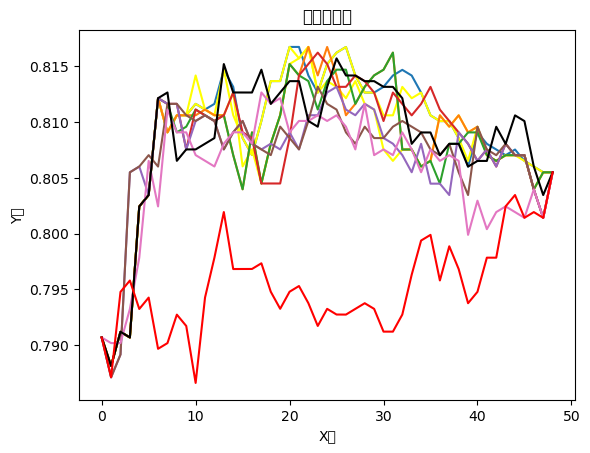

In [27]:
import matplotlib.pyplot as plt

fea_num=[i for i in range(49)]

# 创建图形
plt.plot(fea_num, aver_mean_lis1)
plt.plot(fea_num, aver_mean_lis2,color="yellow")
plt.plot(fea_num, aver_mean_lis3,color="yellow")
plt.plot(fea_num, aver_mean_lis4)
plt.plot(fea_num, aver_mean_lis5)
plt.plot(fea_num, aver_mean_lis6)
plt.plot(fea_num, aver_mean_lis7)
plt.plot(fea_num, aver_mean_lis8)
plt.plot(fea_num, aver_mean_lis9)
plt.plot(fea_num, rfe_SVM_aver_mean_lis,color="black")
plt.plot(fea_num, relief_SVM_aver_mean_lis,color="red")



# 添加标题和标签
plt.title('简单折线图')
plt.xlabel('X轴')
plt.ylabel('Y轴')

# 显示图形
plt.show()


In [48]:
baiyun_accuracy=[]
baiyun_accuracy.append(aver_mean_lis1)
baiyun_accuracy.append(aver_mean_lis2)
baiyun_accuracy.append(aver_mean_lis3)
baiyun_accuracy.append(aver_mean_lis4)
baiyun_accuracy.append(aver_mean_lis5)
baiyun_accuracy.append(aver_mean_lis6)
baiyun_accuracy.append(aver_mean_lis7)
baiyun_accuracy.append(aver_mean_lis8)
baiyun_accuracy.append(aver_mean_lis9)
baiyun_accuracy.append(rfe_SVM_aver_mean_lis)
baiyun_accuracy.append(relief_SVM_aver_mean_lis)

In [49]:
colu=[i for i in range(1,50)]
baiyun_acurracy_dataframe=pd.DataFrame(columns=colu,data=np.array(baiyun_accuracy))
baiyun_acurracy_dataframe.to_csv("baiyun_accuracy.csv")

In [50]:
baiyun_F_measure=[]
baiyun_F_measure.append(F_measure_lis1)
baiyun_F_measure.append(F_measure_lis2)
baiyun_F_measure.append(F_measure_lis3)
baiyun_F_measure.append(F_measure_lis4)
baiyun_F_measure.append(F_measure_lis5)
baiyun_F_measure.append(F_measure_lis6)
baiyun_F_measure.append(F_measure_lis7)
baiyun_F_measure.append(F_measure_lis8)
baiyun_F_measure.append(F_measure_lis9)
baiyun_F_measure.append(rfe_SVM_F_measure_lis)
baiyun_F_measure.append(relief_SVM_F_measure_lis)

In [51]:
colu=[i for i in range(1,50)]
baiyun_F_measure_dataframe=pd.DataFrame(columns=colu,data=np.array(baiyun_F_measure))
baiyun_F_measure_dataframe.to_csv("baiyun_F_measure.csv")